In [ ]:
# --- CELL 1: Import libraries & load dataset ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset (upload your CSV in Colab first)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("India_weather_data.csv")
print("Rows, Columns:", df.shape)
df.head()


Saving India_weather_data.csv to India_weather_data.csv
Rows, Columns: (8766, 9)


,Country,Date,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_Duration
0,India,01-01-2000,27.3,12.9,20.0,0.0,9.0,22.0,35850.03
1,India,02-01-2000,26.8,12.8,19.7,0.0,9.8,24.8,35884.66
2,India,03-01-2000,26.4,13.0,19.6,0.0,9.4,19.8,35920.25
3,India,04-01-2000,26.2,13.4,19.6,0.0,9.8,20.2,35880.49
4,India,05-01-2000,26.3,12.6,19.2,0.0,9.8,21.2,35918.76


In [ ]:
# --- CELL 2: Dataset info ---
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            8766 non-null   object 
 1   Date               8766 non-null   object 
 2   Temp_Max           8766 non-null   float64
 3   Temp_Min           8766 non-null   float64
 4   Temp_Mean          8766 non-null   float64
 5   Precipitation_Sum  8766 non-null   float64
 6   Windspeed_Max      8766 non-null   float64
 7   Windgusts_Max      8766 non-null   float64
 8   Sunshine_Duration  8766 non-null   float64
dtypes: float64(7), object(2)
memory usage: 616.5+ KB


In [ ]:
# --- CELL 3: Parse Date column ---
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
print("Bad dates:", df['Date'].isna().sum())

df = df.dropna(subset=['Date']).sort_values('Date').reset_index(drop=True)
df.set_index('Date', inplace=True)
df.head()


Bad dates: 0


,Country,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_Duration
Date,,,,,,,,
2000-01-01,India,27.3,12.9,20.0,0.0,9.0,22.0,35850.03
2000-01-02,India,26.8,12.8,19.7,0.0,9.8,24.8,35884.66
2000-01-03,India,26.4,13.0,19.6,0.0,9.4,19.8,35920.25
2000-01-04,India,26.2,13.4,19.6,0.0,9.8,20.2,35880.49
2000-01-05,India,26.3,12.6,19.2,0.0,9.8,21.2,35918.76


In [ ]:
# --- CELL 4: Missing values ---
print(df.isna().sum())


Country              0
Temp_Max             0
Temp_Min             0
Temp_Mean            0
Precipitation_Sum    0
Windspeed_Max        0
Windgusts_Max        0
Sunshine_Duration    0
dtype: int64


In [ ]:
# --- CELL 5: Sunshine conversion ---
if df['Sunshine_Duration'].max() > 8640:
    df['Sunshine_hours'] = df['Sunshine_Duration'] / 3600.0
else:
    df['Sunshine_hours'] = df['Sunshine_Duration']

df[['Sunshine_Duration','Sunshine_hours']].head()


,Sunshine_Duration,Sunshine_hours
Date,,
2000-01-01,35850.03,9.958342
2000-01-02,35884.66,9.967961
2000-01-03,35920.25,9.977847
2000-01-04,35880.49,9.966803
2000-01-05,35918.76,9.977433


In [ ]:
# --- CELL 6: Summary statistics ---
df[['Temp_Max','Temp_Min','Temp_Mean','Precipitation_Sum',
    'Windspeed_Max','Windgusts_Max','Sunshine_hours']].describe()


,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_hours
count,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000
mean,32.858157,22.423488,27.422485,3.359354,13.117488,28.876968,9.561237
std,4.968256,4.872109,4.622524,10.352523,4.495779,8.972592,2.899761
min,19.700000,9.200000,15.800000,0.000000,4.400000,12.600000,0.000000
25%,29.400000,18.625000,24.300000,0.000000,9.600000,22.000000,9.876257
50%,31.300000,23.500000,26.800000,0.000000,12.000000,27.000000,10.364644
75%,35.900000,25.200000,29.700000,1.200000,15.900000,34.600000,11.172146
max,46.900000,34.800000,40.100000,216.300000,35.900000,78.100000,12.338658


In [ ]:
# --- CELL 7: Add Year/Month/Day ---
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DOY'] = df.index.dayofyear
df.head()


,Country,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_Duration,Sunshine_hours,Year,Month,Day,DOY
Date,,,,,,,,,,,,,
2000-01-01,India,27.3,12.9,20.0,0.0,9.0,22.0,35850.03,9.958342,2000,1,1,1
2000-01-02,India,26.8,12.8,19.7,0.0,9.8,24.8,35884.66,9.967961,2000,1,2,2
2000-01-03,India,26.4,13.0,19.6,0.0,9.4,19.8,35920.25,9.977847,2000,1,3,3
2000-01-04,India,26.2,13.4,19.6,0.0,9.8,20.2,35880.49,9.966803,2000,1,4,4
2000-01-05,India,26.3,12.6,19.2,0.0,9.8,21.2,35918.76,9.977433,2000,1,5,5


In [ ]:
# --- CELL 8: Monthly averages ---
monthly_avg = df.groupby(['Year','Month']).agg({
    'Temp_Max':'mean','Temp_Min':'mean','Temp_Mean':'mean',
    'Precipitation_Sum':'sum','Windspeed_Max':'mean',
    'Windgusts_Max':'mean','Sunshine_hours':'mean'
}).reset_index()

monthly_avg.head(12)


,Year,Month,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_hours
0,2000,1,28.612903,14.751613,21.651613,0.2,10.125806,23.574194,10.043458
1,2000,2,29.144828,17.744828,23.224138,27.3,12.113793,26.906897,9.819541
2,2000,3,35.232258,19.987097,27.648387,0.9,12.677419,27.638710,11.306634
3,2000,4,41.820000,26.993333,34.636667,0.0,14.130000,30.766667,11.703741
4,2000,5,39.961290,29.054839,34.203226,45.2,16.438710,36.135484,11.606588
5,2000,6,32.483333,25.466667,28.510000,362.0,15.793333,35.596667,8.273251
6,2000,7,28.935484,23.967742,26.203226,558.5,16.770968,36.300000,6.492296
7,2000,8,29.512903,24.087097,26.451613,411.2,15.561290,33.906452,6.979881
8,2000,9,31.100000,23.623333,27.230000,51.3,11.550000,26.753333,10.195417
9,2000,10,33.893548,22.251613,28.148387,0.0,9.238710,21.948387,10.892300


In [ ]:
# --- CELL 9: Yearly aggregates ---
yearly = df.groupby('Year').agg({
    'Temp_Max':'mean','Temp_Min':'mean','Temp_Mean':'mean',
    'Precipitation_Sum':'sum','Sunshine_hours':'mean'
}).reset_index()

yearly


,Year,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Sunshine_hours
0,2000,32.555464,21.609016,26.936885,1457.9,9.807126
1,2001,32.602740,22.247671,27.234795,1084.0,9.548344
2,2002,33.325753,22.736986,27.880822,960.5,9.800369
3,2003,32.586849,22.547945,27.364110,1190.2,9.477676
4,2004,32.900820,22.087705,27.323770,884.8,9.922139
5,2005,32.492603,21.965753,27.026575,1256.4,9.604710
6,2006,32.585479,22.125479,27.188493,1050.9,9.776587
7,2007,32.889589,22.377534,27.445205,1149.3,9.808915
8,2008,32.854098,22.446995,27.501366,923.3,9.640941
9,2009,33.821644,23.086301,28.282466,1261.5,9.805290


In [ ]:
# --- CELL 10: Correlation ---
corr_cols = ['Temp_Max','Temp_Min','Temp_Mean',
             'Precipitation_Sum','Windspeed_Max',
             'Windgusts_Max','Sunshine_hours']
corr = df[corr_cols].corr()
corr


,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_hours
Temp_Max,1.000000,0.693828,0.932552,-0.274231,0.190890,0.166386,0.536355
Temp_Min,0.693828,1.000000,0.900673,0.108218,0.501766,0.535073,0.026681
Temp_Mean,0.932552,0.900673,1.000000,-0.107278,0.350858,0.351977,0.326773
Precipitation_Sum,-0.274231,0.108218,-0.107278,1.000000,0.254388,0.277817,-0.635325
Windspeed_Max,0.190890,0.501766,0.350858,0.254388,1.000000,0.907046,-0.246053
Windgusts_Max,0.166386,0.535073,0.351977,0.277817,0.907046,1.000000,-0.254503
Sunshine_hours,0.536355,0.026681,0.326773,-0.635325,-0.246053,-0.254503,1.000000


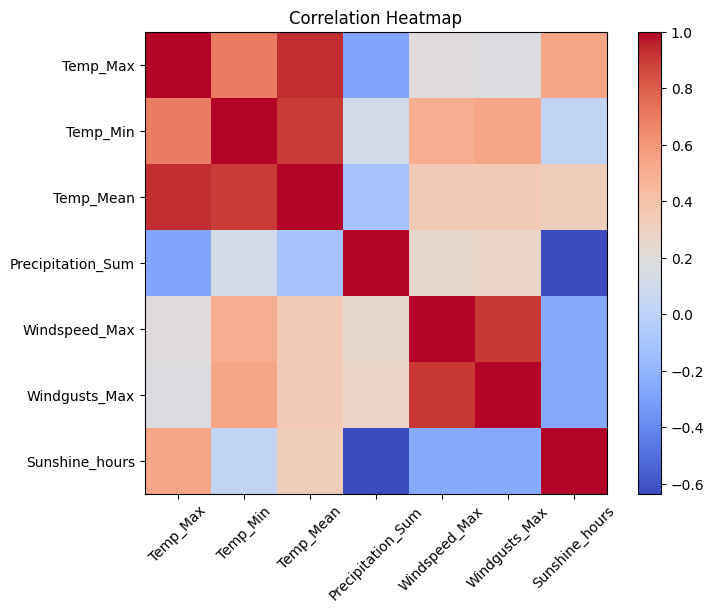

In [ ]:
# --- CELL 11: Heatmap ---
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45)
plt.yticks(range(len(corr_cols)), corr_cols)
plt.title("Correlation Heatmap")
plt.show()


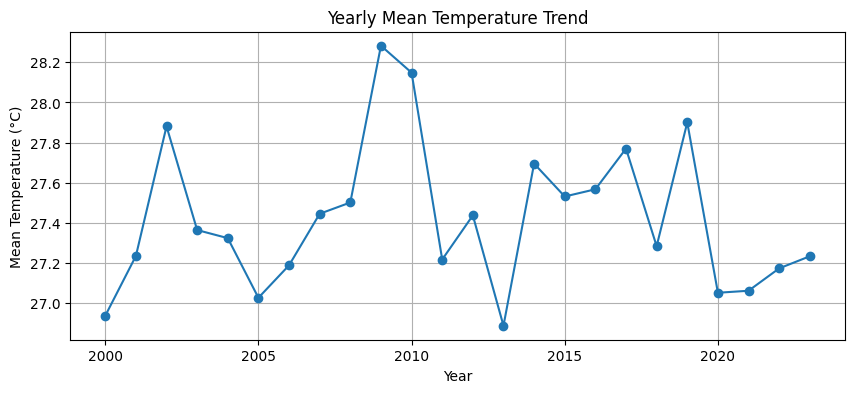

In [ ]:
# --- CELL 12: Yearly Mean Temperature Trend ---
plt.figure(figsize=(10,4))
plt.plot(yearly['Year'], yearly['Temp_Mean'], marker='o')
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.title("Yearly Mean Temperature Trend")
plt.grid(True)
plt.show()


In [ ]:
# --- CELL 13: Monthly climatology ---
monthly_climatology = df.groupby('Month').agg({
    'Temp_Max':'mean','Temp_Min':'mean','Temp_Mean':'mean',
    'Precipitation_Sum':'mean','Sunshine_hours':'mean'
}).reset_index()

monthly_climatology


,Month,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Sunshine_hours
0,1,28.433602,15.792070,21.825941,0.368011,9.816334
1,2,31.718289,18.303540,24.847050,0.204720,10.226578
2,3,35.841667,22.050134,28.963710,0.377823,11.016282
3,4,40.009583,26.246111,33.257500,0.370139,11.453647
4,5,41.773790,29.790860,35.742876,0.271505,11.690086
5,6,36.044028,27.789167,31.551944,6.060000,9.191103
6,7,30.153091,24.844892,27.103495,12.950000,6.230092
7,8,29.403763,24.269355,26.433737,10.594624,6.551698
8,9,30.712500,23.991944,26.945139,6.679306,8.589762
9,10,31.576075,21.640591,26.393952,1.687366,10.143080


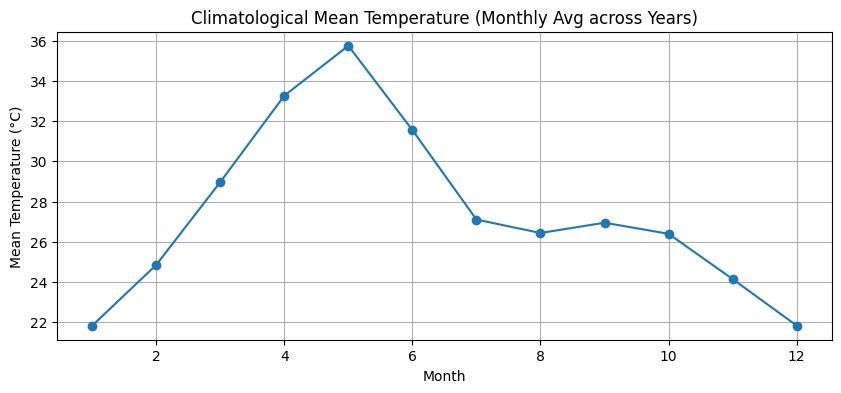

In [ ]:
# --- CELL 13b: Plot climatology ---
plt.figure(figsize=(10,4))
plt.plot(monthly_climatology['Month'], monthly_climatology['Temp_Mean'], marker='o')
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.title("Climatological Mean Temperature (Monthly Avg across Years)")
plt.grid(True)
plt.show()


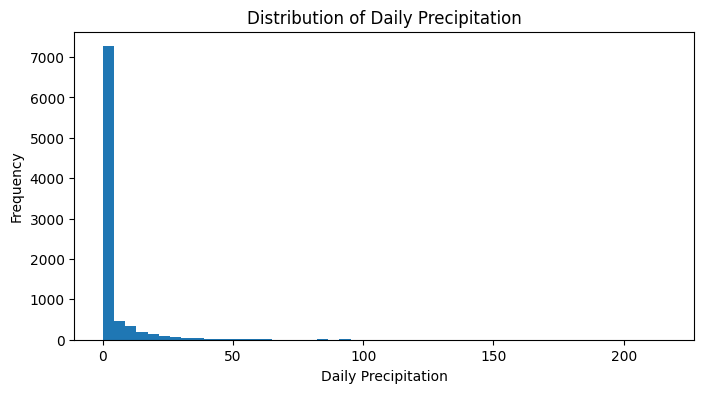

In [ ]:
# --- CELL 14: Precipitation Distribution ---
plt.figure(figsize=(8,4))
plt.hist(df['Precipitation_Sum'], bins=50)
plt.xlabel("Daily Precipitation")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Precipitation")
plt.show()


In [ ]:
# --- CELL 14b: Top rainiest days ---
df.sort_values('Precipitation_Sum', ascending=False).head(20)


,Country,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_Duration,Sunshine_hours,Year,Month,Day,DOY
Date,,,,,,,,,,,,,
2000-07-12,India,25.6,23.5,24.4,216.3,26.3,44.3,0.00,0.000000,2000,7,12,194
2000-07-13,India,24.6,23.5,24.0,181.1,25.1,47.9,0.00,0.000000,2000,7,13,195
2022-07-18,India,27.0,24.4,25.4,159.9,35.9,62.6,3600.00,1.000000,2022,7,18,199
2001-06-14,India,27.5,23.7,25.3,158.8,33.0,78.1,3272.89,0.909136,2001,6,14,165
2009-07-22,India,24.7,23.5,24.1,141.3,24.5,56.9,0.00,0.000000,2009,7,22,203
2018-09-21,India,28.1,24.2,25.6,136.2,33.2,56.5,570.42,0.158450,2018,9,21,264
2015-08-04,India,24.0,23.0,23.4,135.9,24.8,58.3,0.00,0.000000,2015,8,4,216
2010-07-25,India,25.0,23.5,24.3,133.6,20.2,49.0,0.00,0.000000,2010,7,25,206
2013-08-22,India,24.0,22.9,23.3,128.9,23.8,55.4,0.00,0.000000,2013,8,22,234


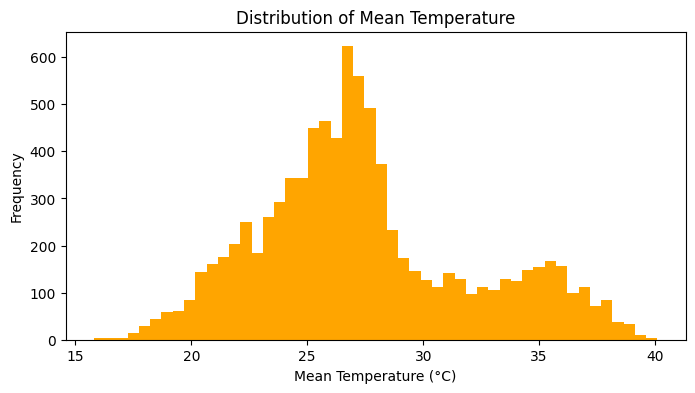

In [ ]:
# --- CELL 15: Temperature Histogram ---
plt.figure(figsize=(8,4))
plt.hist(df['Temp_Mean'], bins=50, color='orange')
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Mean Temperature")
plt.show()


/tmp/ipython-input-3298773098.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(month_groups, labels=list(range(1,13)), showfliers=False)


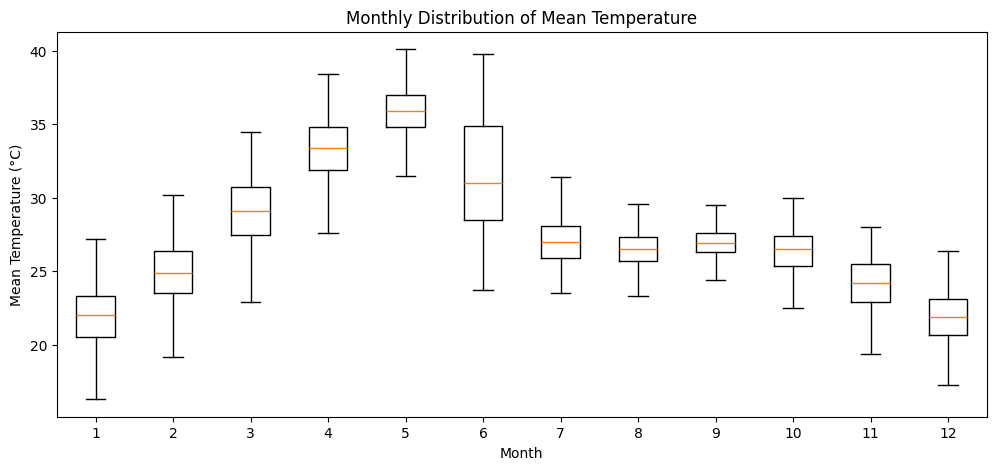

In [ ]:
# --- CELL 16: Monthly Temp Boxplot ---
month_groups = [df[df['Month']==m]['Temp_Mean'].values for m in range(1,13)]

plt.figure(figsize=(12,5))
plt.boxplot(month_groups, labels=list(range(1,13)), showfliers=False)
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.title("Monthly Distribution of Mean Temperature")
plt.show()


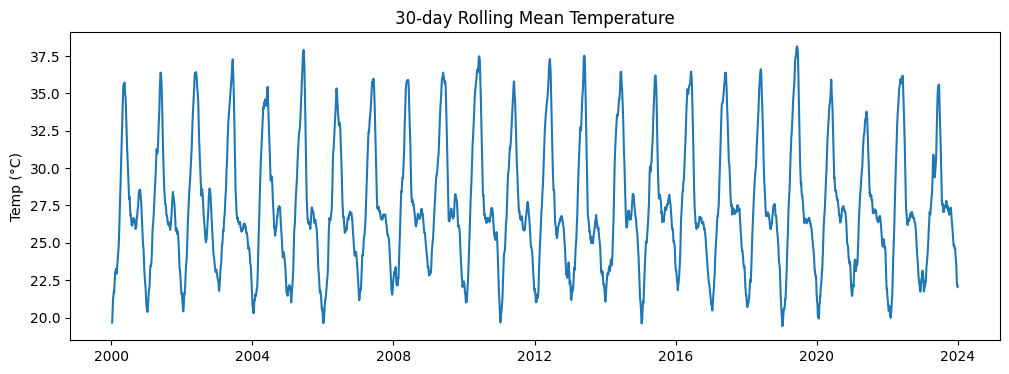

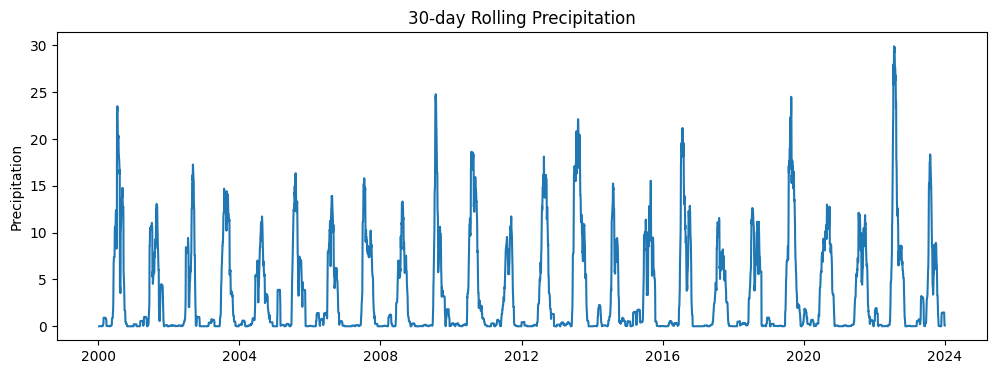

In [ ]:
# --- CELL 17: Rolling Averages ---
df['Temp_Mean_30d'] = df['Temp_Mean'].rolling(window=30, min_periods=10).mean()
df['Precip_30d'] = df['Precipitation_Sum'].rolling(window=30, min_periods=10).mean()

plt.figure(figsize=(12,4))
plt.plot(df.index, df['Temp_Mean_30d'])
plt.title("30-day Rolling Mean Temperature")
plt.ylabel("Temp (°C)")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df.index, df['Precip_30d'])
plt.title("30-day Rolling Precipitation")
plt.ylabel("Precipitation")
plt.show()


In [ ]:
# --- CELL 21: Top Hottest & Coldest Days ---
hottest = df.sort_values('Temp_Max', ascending=False).head(10)
coldest = df.sort_values('Temp_Min', ascending=True).head(10)

print("Top 10 Hottest Days:\n", hottest[['Temp_Max','Temp_Mean']])
print("\nTop 10 Coldest Days:\n", coldest[['Temp_Min','Temp_Mean']])


Top 10 Hottest Days:
             Temp_Max  Temp_Mean
Date                           
2010-05-24      46.9       39.0
2013-05-22      46.4       40.1
2013-05-21      46.2       39.6
2010-05-25      46.0       39.5
2015-05-21      45.8       38.6
2013-05-20      45.8       38.9
2019-05-28      45.8       39.7
2003-06-04      45.6       39.2
2015-05-19      45.5       38.4
2003-06-01      45.4       39.2

Top 10 Coldest Days:
             Temp_Min  Temp_Mean
Date                           
2019-01-30       9.2       16.3
2019-12-29       9.2       16.0
2012-01-15       9.8       18.1
2011-01-08       9.9       17.6
2018-12-29       9.9       16.5
2012-01-14       9.9       17.0
2019-01-31       9.9       18.5
2018-12-30      10.1       16.3
2020-01-11      10.2       15.8
2005-12-27      10.3       17.5


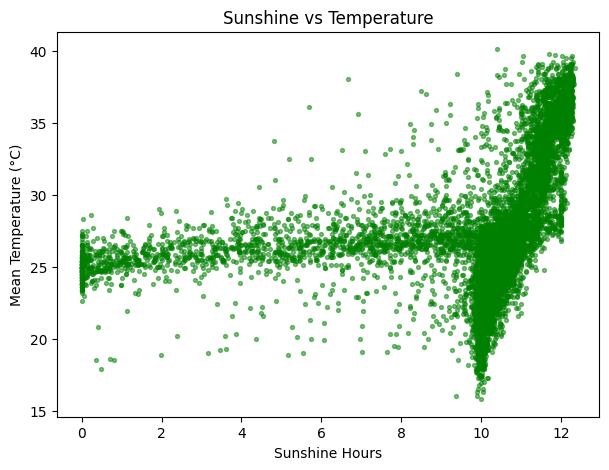

In [ ]:
# --- CELL 20: Sunshine vs Temp ---
plt.figure(figsize=(7,5))
plt.scatter(df['Sunshine_hours'], df['Temp_Mean'], s=8, alpha=0.5, color="green")
plt.xlabel("Sunshine Hours")
plt.ylabel("Mean Temperature (°C)")
plt.title("Sunshine vs Temperature")
plt.show()


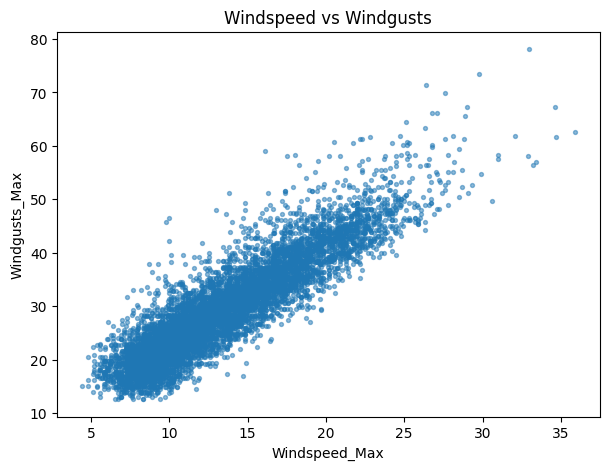

In [ ]:
# --- CELL 19: Windspeed vs Gusts ---
plt.figure(figsize=(7,5))
plt.scatter(df['Windspeed_Max'], df['Windgusts_Max'], s=8, alpha=0.5)
plt.xlabel("Windspeed_Max")
plt.ylabel("Windgusts_Max")
plt.title("Windspeed vs Windgusts")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predictions for 2024:
- Mean Temperature: 27.41 °C
- Total Precipitation: 1375.49
- Sunshine Hours (avg): 9.37 hrs


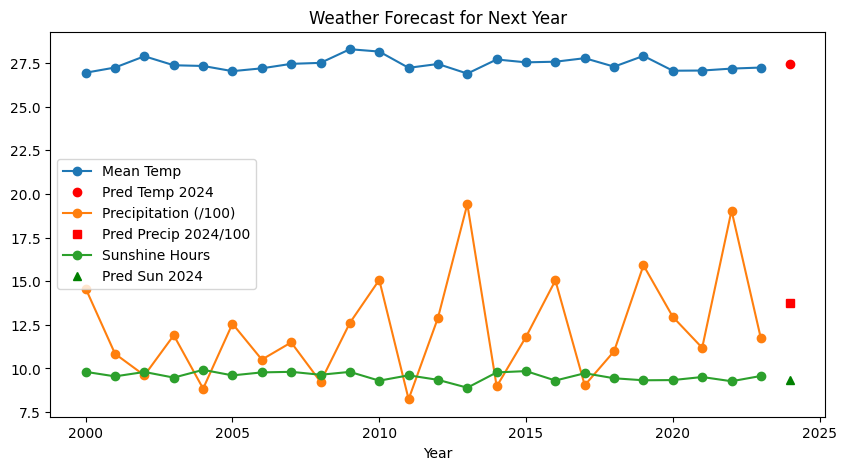

In [ ]:
# --- Next Year Weather Prediction (Linear Regression) ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Group by yearly data
yearly = df.groupby('Year').agg({
    'Temp_Max':'mean','Temp_Min':'mean','Temp_Mean':'mean',
    'Precipitation_Sum':'sum','Sunshine_hours':'mean'
}).reset_index()

# Prepare features
X = yearly[['Year']]
next_year = yearly['Year'].max() + 1

# Train and predict temperature
model_temp = LinearRegression().fit(X, yearly['Temp_Mean'])
pred_temp = model_temp.predict([[next_year]])

# Train and predict precipitation
model_precip = LinearRegression().fit(X, yearly['Precipitation_Sum'])
pred_precip = model_precip.predict([[next_year]])

# Train and predict sunshine
model_sun = LinearRegression().fit(X, yearly['Sunshine_hours'])
pred_sun = model_sun.predict([[next_year]])

# Print results
print(f"Predictions for {next_year}:")
print(f"- Mean Temperature: {pred_temp[0]:.2f} °C")
print(f"- Total Precipitation: {pred_precip[0]:.2f}")
print(f"- Sunshine Hours (avg): {pred_sun[0]:.2f} hrs")

# Plot trends + next year prediction
plt.figure(figsize=(10,5))
plt.plot(yearly['Year'], yearly['Temp_Mean'], marker='o', label="Mean Temp")
plt.plot([next_year], pred_temp, 'ro', label=f"Pred Temp {next_year}")

plt.plot(yearly['Year'], yearly['Precipitation_Sum']/100, marker='o', label="Precipitation (/100)")
plt.plot([next_year], pred_precip/100, 'rs', label=f"Pred Precip {next_year}/100")

plt.plot(yearly['Year'], yearly['Sunshine_hours'], marker='o', label="Sunshine Hours")
plt.plot([next_year], pred_sun, 'g^', label=f"Pred Sun {next_year}")

plt.legend()
plt.title("Weather Forecast for Next Year")
plt.xlabel("Year")
plt.show()
